<a href="https://colab.research.google.com/github/tec03/ParaAssignment01-/blob/main/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Juan Pablo Bladinieres Martin del Campo A01793474

Evaluación del modelo : nos dice como nuestro modelo se desempeña en el mundo real.
* Separación de datos en Entrenamiento y Prueba.
* Entrenamiento: datos que se utilizan para generar nuestro modelo.
* Prueba: datos que se utilizan para validar el modelo generado con los datos de entrenamiento.
* Al final se deben usar todos los datos para generar el mejor modelo posible antes de pronosticar los datos.

Error de generalización:
Es cuando se sobre ajusta un modelo a nuestros datos de entrenamiento y por ende no se puede generar una buena predicción.

Validación Cruzada:
Este metodo nos ayuda a validar todas las combinaciones de resultado de modelo para verificar si no hay sobreentrenamiento.



In [6]:
# Get Data and create csv to work localy
import requests
import os
import pandas as pd
import numpy as np

url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
path=os.path.join(os.getcwd(),'cars.csv')

df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df=df.replace('?',np.NaN)
df["price"] = df["price"].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["make"] = df["make"].astype("string")
df["fuel-type"] = df["fuel-type"].astype("string")
df["aspiration"] = df["aspiration"].astype("string")
df["num-of-doors"] = df["num-of-doors"].astype("string")
df["body-style"] = df["body-style"].astype("string")
df["drive-wheels"] = df["drive-wheels"].astype("string")
df["engine-location"] = df["engine-location"].astype("string")
df["engine-type"] = df["engine-type"].astype("string")
df["fuel-system"] = df["fuel-system"].astype("string")
df["num-of-cylinders"] = df["num-of-cylinders"].astype("string")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df.dropna(inplace=True)
df.to_csv(path)

# Read from local file
#path="./cars.csv"
#df=pd.read_csv(path)

# Read online
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df=df.replace('?',np.NaN)
df["price"] = df["price"].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["make"] = df["make"].astype("string")
df["fuel-type"] = df["fuel-type"].astype("string")
df["aspiration"] = df["aspiration"].astype("string")
df["num-of-doors"] = df["num-of-doors"].astype("string")
df["body-style"] = df["body-style"].astype("string")
df["drive-wheels"] = df["drive-wheels"].astype("string")
df["engine-location"] = df["engine-location"].astype("string")
df["engine-type"] = df["engine-type"].astype("string")
df["fuel-system"] = df["fuel-system"].astype("string")
df["num-of-cylinders"] = df["num-of-cylinders"].astype("string")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df.dropna(inplace=True)
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [3]:
# Data Separation
from sklearn.model_selection import train_test_split

# Separate the data into variables and output
y=df['price']
X=df.drop(labels='price',axis=1)

# Separate into training and test data
# 30% test data test_size=0.3
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print('X_train shape: ',x_train.shape)
print('X_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (111, 25)
X_test shape:  (48, 25)
y_train shape:  (111,)
y_test shape:  (48,)


In [7]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

numerical=['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']
X_num=X[numerical]

# Validate model with mean of scores of cv partitions
lr=LinearRegression()
scores=cross_val_score(lr,X_num,y,cv=3)
np.mean(scores)


0.6413119226626359

In [9]:
# Prediction with cross validate
from sklearn.model_selection import cross_val_predict

yhat=cross_val_predict(lr,X_num,y,cv=3)

yhat


array([11773.66954624, 13716.18056519, 19409.72957253, 21995.28205442,
       10884.42505162, 10884.42505162, 10112.88367382, 10345.49458513,
        1010.44916461,  6546.60841137,  6462.16109636,  6466.71095975,
        6444.13164128,  8602.20316215,  6865.10297416,  6958.14733868,
        6958.14733868,  9325.98993144, 13392.72908074,  5356.91019779,
        7595.2865859 ,  7236.67219183,  8151.58448951,  8219.25311826,
        7765.87930479,  8310.33746404,  9611.48281856,  9835.63515128,
        9352.58075542,  6140.90148697, 10701.20241807, 11058.17437791,
       20831.54036298,  6334.24025396,  6580.71136409,  6601.85781057,
        6239.91904802,  6253.76269683, 10069.33007537, 10257.45450213,
       10069.33007537, 10257.45450213, 10320.89384158, 12942.16739235,
       20614.14820251, 21735.95989501, 20509.26141667, 22951.91534211,
       21178.77337244,  7441.1381439 ,  7529.57681097,  7783.33416877,
        8706.86459663,  9789.65155472,  9345.12658029,  9375.62109778,
      

Subentrenamiento (Underfitting):
Se reifiere cuando el modelo tiene demaciados errores y no es posible predecir los datos correctamente.

Sobreentrenamiento (Overfitting):
Se refiere cuando el modelo es demaciado complejo y se ajusta demaciado a nuestros datos de entrenamiento por lo que no es realista al momento de predecir.

NOTA: siempre existira un grado de error irreducible debido al ruido.



[0.622783465894838, 0.6302292057784656, 0.6549200048453603, 0.6797546315467957]

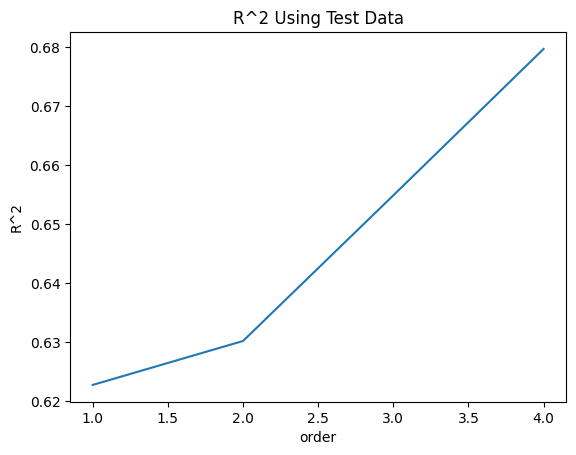

In [34]:
# Model validation with R2
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

R2_Test=[]
order=[1,2,3,4]

for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    x_test_pr=pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr,y_train)
    R2_Test.append(lr.score(x_test_pr,y_test))

plt.plot(order, R2_Test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
R2_Test


Regresión Ridge
Sirve para ajustes de sobreentrenamiento.

Alfa es una variable que se utiliza en los modelos para ajustes de datos extremos y ayuda a balancear nuestro modelo.

Se puede observar sencillamente cuando los coeficientes de un modelo polinomial tienen magnitudes altas que esta sobrentrenado.

array([11357.49017378, 15372.71284538, 18990.28507426, 20866.60767297,
       11570.85054955, 11570.85054955, 14939.56753229, 15217.2991946 ,
         328.11482948,  6240.81923732,  6008.2589309 ,  6141.4332368 ,
        6095.58174139,  8058.49492001,  6795.85345005,  6906.94611498,
        6906.94611498, 11078.01163496, 14242.69044237,  4595.69217805,
        6376.18463   ,  6427.42569815,  7648.40076717,  7729.19543257,
        7427.91943015,  7884.02415618,  9277.37743566,  9545.0097648 ,
        8751.16195297,  6974.77701039,  9965.36379774, 10104.35124816,
       29236.94225659,  5947.20867053,  5956.73080429,  5981.97913722,
        5547.41857185,  5483.42087574, 10396.13562217, 10484.50572611,
       10396.13562217, 10484.50572611, 10560.25072493, 14476.93545134,
       24072.03282321, 25354.7130671 , 23618.64045139, 26381.73463068,
       27258.9067007 ,  7281.05367681,  7367.56932902,  7670.54932427,
        8375.35564381, 10357.88735551,  9425.07729426,  9530.50854253,
      

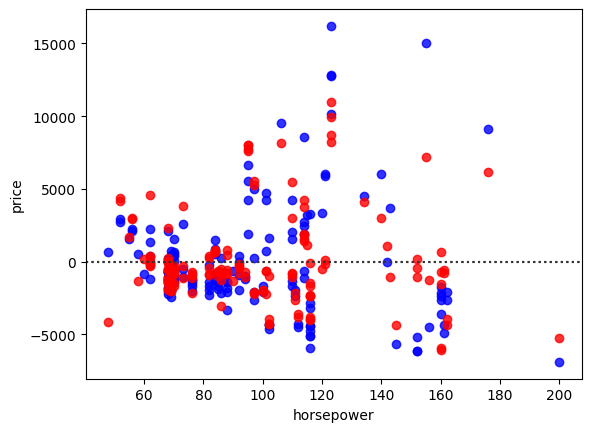

In [25]:
# Ridge regression
from sklearn.linear_model import Ridge
import seaborn as sns


RigeModel=Ridge(alpha=0.1)
RigeModel.fit(X_num,y)
yhat=RigeModel.predict(X_num)

sns.residplot(x=X_num['horsepower'],y=y,color='b')
sns.residplot(x=X_num['horsepower'],y=yhat,color='r')

yhat

Busqueda de Malla:
Nos ayuda a buscar hyperparámetros con validación cruzada para encontrar el menor error para que usemos los parámetros optimos.

In [30]:
# Grid Search
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Parameters available for this model
parameters=[{'alpha':[0.001,0.1,10,100,1000,10000,100000],'normalize':[True,False]}]

RR=Ridge()
Grid=GridSearchCV(RR,parameters,cv=4)
Grid.fit(X[['horsepower','curb-weight','engine-size','highway-mpg']],y)
Grid.best_estimator_
scores=Grid.cv_results_
scores['mean_test_score']

c:\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_

array([ 0.71741228,  0.71671695,  0.74537242,  0.7167174 ,  0.29631403,
        0.71676267, -0.03069494,  0.71715014, -0.08113647,  0.71976109,
       -0.0864416 ,  0.73023719, -0.08697484,  0.74921838])

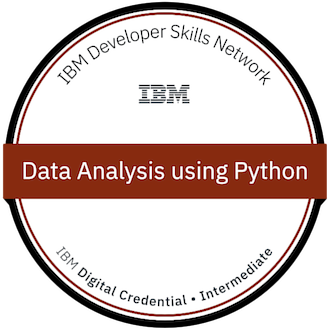

In [35]:
# Results of the Module Progress
import os 
from PIL import Image

imgpath="./data-analysis-using-python.png"
Image.open(imgpath) 